# Movielens Dataset N Ratings Per Year Analysis

In [1]:
# Center All Plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Load Libraries

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Configure

In [4]:
# Load Dataset
movies = pd.read_csv(r'C:/Users/Yukawa/datasets/ml-latest-small/movies.csv')
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [5]:
ratings = pd.read_csv(r'C:/Users/Yukawa/datasets/ml-latest-small/ratings.csv')
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [6]:
# Organise Ratings
ratings.sort_values(by='movieId', inplace=True)
ratings.reset_index(inplace=True, drop= True)
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,517,1,4.0,1487954343
2,213,1,3.5,1316196157
3,514,1,4.0,1533872400
4,214,1,3.0,853937855
5,216,1,3.0,975211713
6,217,1,4.0,955942540
7,219,1,3.5,1194681084
8,509,1,4.0,1435992343
9,220,1,5.0,1230055565


In [7]:
# Split title and release year in separate columns in movies dataframe. Convert year to timestamp.
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True)
movies.year = pd.to_datetime(movies.year, format='%Y')
movies.year = movies.year.dt.year # As there are some NaN years, resulting type will be float (decimals)
movies.title = movies.title.str[:-7]
movies.head(10)

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji,Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men,Comedy|Romance,1995.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II,Comedy,1995.0
5,6,Heat,Action|Crime|Thriller,1995.0
6,7,Sabrina,Comedy|Romance,1995.0
7,8,Tom and Huck,Adventure|Children,1995.0
8,9,Sudden Death,Action,1995.0
9,10,GoldenEye,Action|Adventure|Thriller,1995.0


In [8]:
# Categorize movies genres properly. 
genres_unique = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()
genres_unique

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [9]:
genres_unique = pd.DataFrame(genres_unique, columns=['genres']) # Format into DataFrame to store later
genres_unique

,genres
0,Adventure
1,Animation
2,Children
3,Comedy
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


In [10]:
movies = movies.join(movies.genres.str.get_dummies().astype(bool))
movies.drop('genres', inplace=True, axis=1)

In [11]:
# Modify rating timestamp format (from seconds to datetime year)

ratings.timestamp = pd.to_datetime(ratings.timestamp, unit='s', origin='unix')
ratings.timestamp.head()

0   2000-07-30 18:45:03
1   2017-02-24 16:39:03
2   2011-09-16 18:02:37
3   2018-08-10 03:40:00
4   1997-01-22 12:57:35
Name: timestamp, dtype: datetime64[ns]

In [12]:
# Check and clean NaN values
print ("Number of movies Null values: ", max(movies.isnull().sum()))
print ("Number of ratings Null values: ", max(ratings.isnull().sum()))
movies.dropna(inplace=True)
ratings.dropna(inplace=True)
    
# Organise a bit, then save into feather-formatand clear from memory
movies.sort_values(by='movieId', inplace=True)
ratings.sort_values(by='movieId', inplace=True)
movies.reset_index(inplace=True, drop=True)
ratings.reset_index(inplace=True, drop=True)

Number of movies Null values:  13
Number of ratings Null values:  0


In [13]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,584,1,5.0,1996-06-17 05:00:43
2,381,1,3.5,2006-11-24 15:54:13
3,580,1,3.0,2007-01-03 02:45:49
4,399,1,4.0,2006-12-27 11:53:48
...,...,...,...,...
100831,184,193581,4.0,2018-09-16 14:44:42
100832,184,193583,3.5,2018-09-16 14:52:25
100833,184,193585,3.5,2018-09-16 14:56:45
100834,184,193587,3.5,2018-09-16 15:00:21


##  Explore The Movielens Dataset

### Number of Ratings Per Year

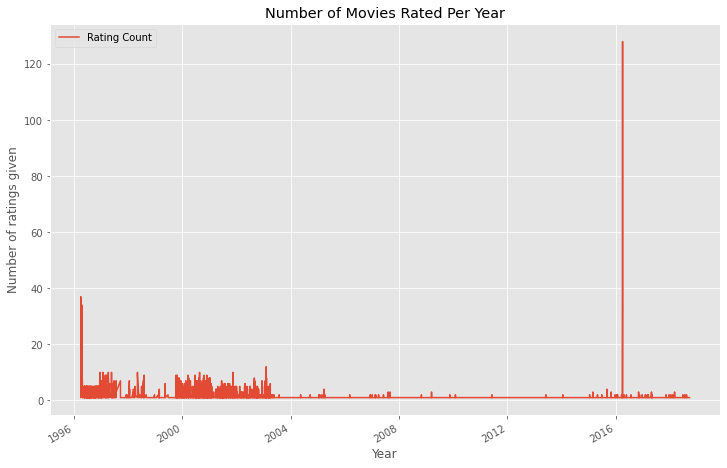

In [14]:
ratings_per_year = ratings[['rating', 'timestamp']].groupby('timestamp').count()
ratings_per_year.columns = ['Rating Count']
ax1 = ratings_per_year.plot(kind='line',figsize=(12,8))
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of ratings given')
plt.title('Number of Movies Rated Per Year')
plt.show()

In [15]:
ratings_df = ratings[['rating', 'timestamp']].groupby('timestamp').count().sort_values(by="rating", ascending=False)
ratings_df.head( )

,rating
timestamp,
2016-04-04 16:39:58,128
2016-04-04 16:39:57,124
2016-04-04 16:39:56,85
1996-03-29 18:36:56,37
2016-04-04 16:39:55,37


In [16]:
for i in range(0, 20):
    if ratings_df.iloc[i]['rating'] > 15:
        ratings_df.iloc[i]['rating'] = 15

In [17]:
ratings_df.head(15)

,rating
timestamp,
2016-04-04 16:39:58,15
2016-04-04 16:39:57,15
2016-04-04 16:39:56,15
1996-03-29 18:36:56,15
2016-04-04 16:39:55,15
1996-04-17 17:08:18,15
1996-04-17 17:08:17,15
1996-04-18 11:46:45,15
1996-04-17 16:50:09,15


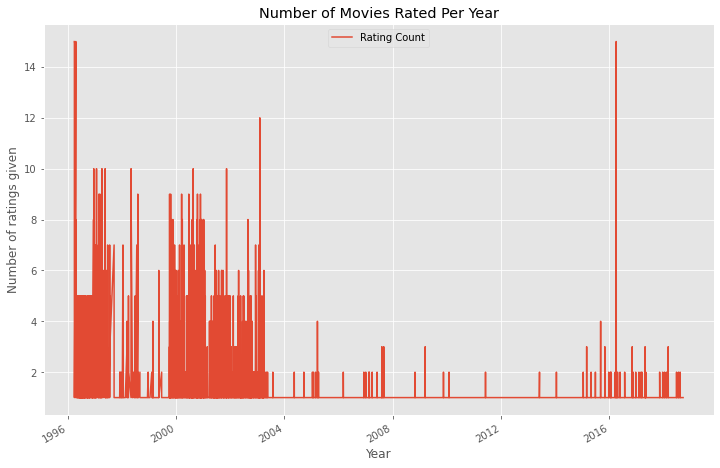

In [43]:
ratings_per_year = ratings_df.copy()
ratings_per_year.columns = ['Rating Count']
ax1 = ratings_per_year.plot(kind='line',figsize=(12,8))
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of ratings given')
plt.title('Number of Movies Rated Per Year')
plt.show()

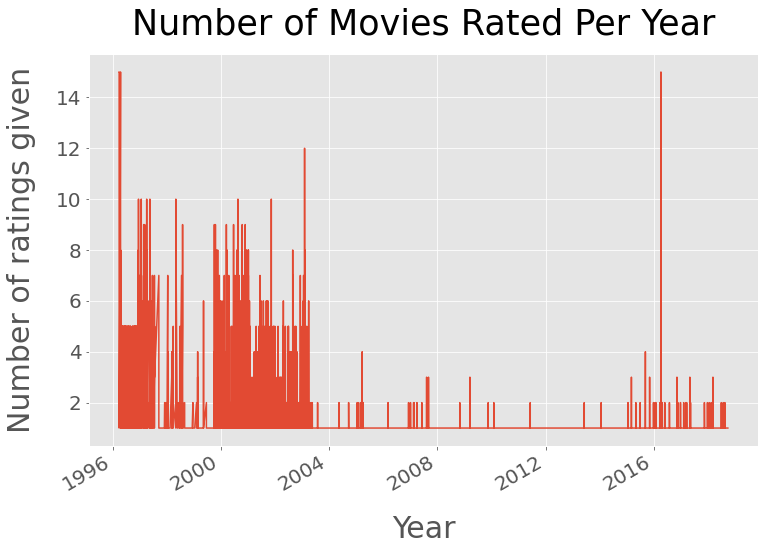

In [42]:
ratings_per_year = ratings_df.copy()
ratings_per_year.columns = ['Rating Count']
ax1 = ratings_per_year.plot(kind='line',figsize=(12,8))
ax1.set_xlabel('Year', labelpad=20, fontsize=30)
ax1.set_ylabel('Number of ratings given', labelpad=20, fontsize=30)
plt.title('Number of Movies Rated Per Year', pad=20,fontsize=35)
ax1.get_legend().remove()
ax1.tick_params(axis='both', which='major', labelsize=20)
plt.show()